In [1]:
# for manupilating data
import pandas  as pd 
import numpy as np

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore

sns.set_style("darkgrid")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

# Remove Warning

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Take a look at the data

In [3]:
df = pd.read_csv('/kaggle/input/airline-passenger-satisfaction/train.csv') # this is a data that i will training on it
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df.shape

(103904, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [6]:
df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [7]:
df.duplicated().any()

False

In [8]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [9]:
df.describe(include = "O")

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


# Ok After I used these functions I noticed many things :
>- Number of Rows is :  `103904` 
>
>                                                                                     
>- Number of columns is :  `25`
>
>
>- There are null values in column: `Arrival Delay in Minutes`
>
>
>- There is `"0"` complete duplicate
>
>
>- `Unnamed: 0` and `id` columns wouldn't be useful so i will drop this columns in cleaning's step
>
>
>- There are `1` column is float64 , `19` int64 and `5` object
>
>
>- There are `variation` in Flight Distance, Departure Delay and Arrival Delay in minutes 


## Explore and Visualize the Data to Gain Insights ( EDA )

In [10]:
# the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=18)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

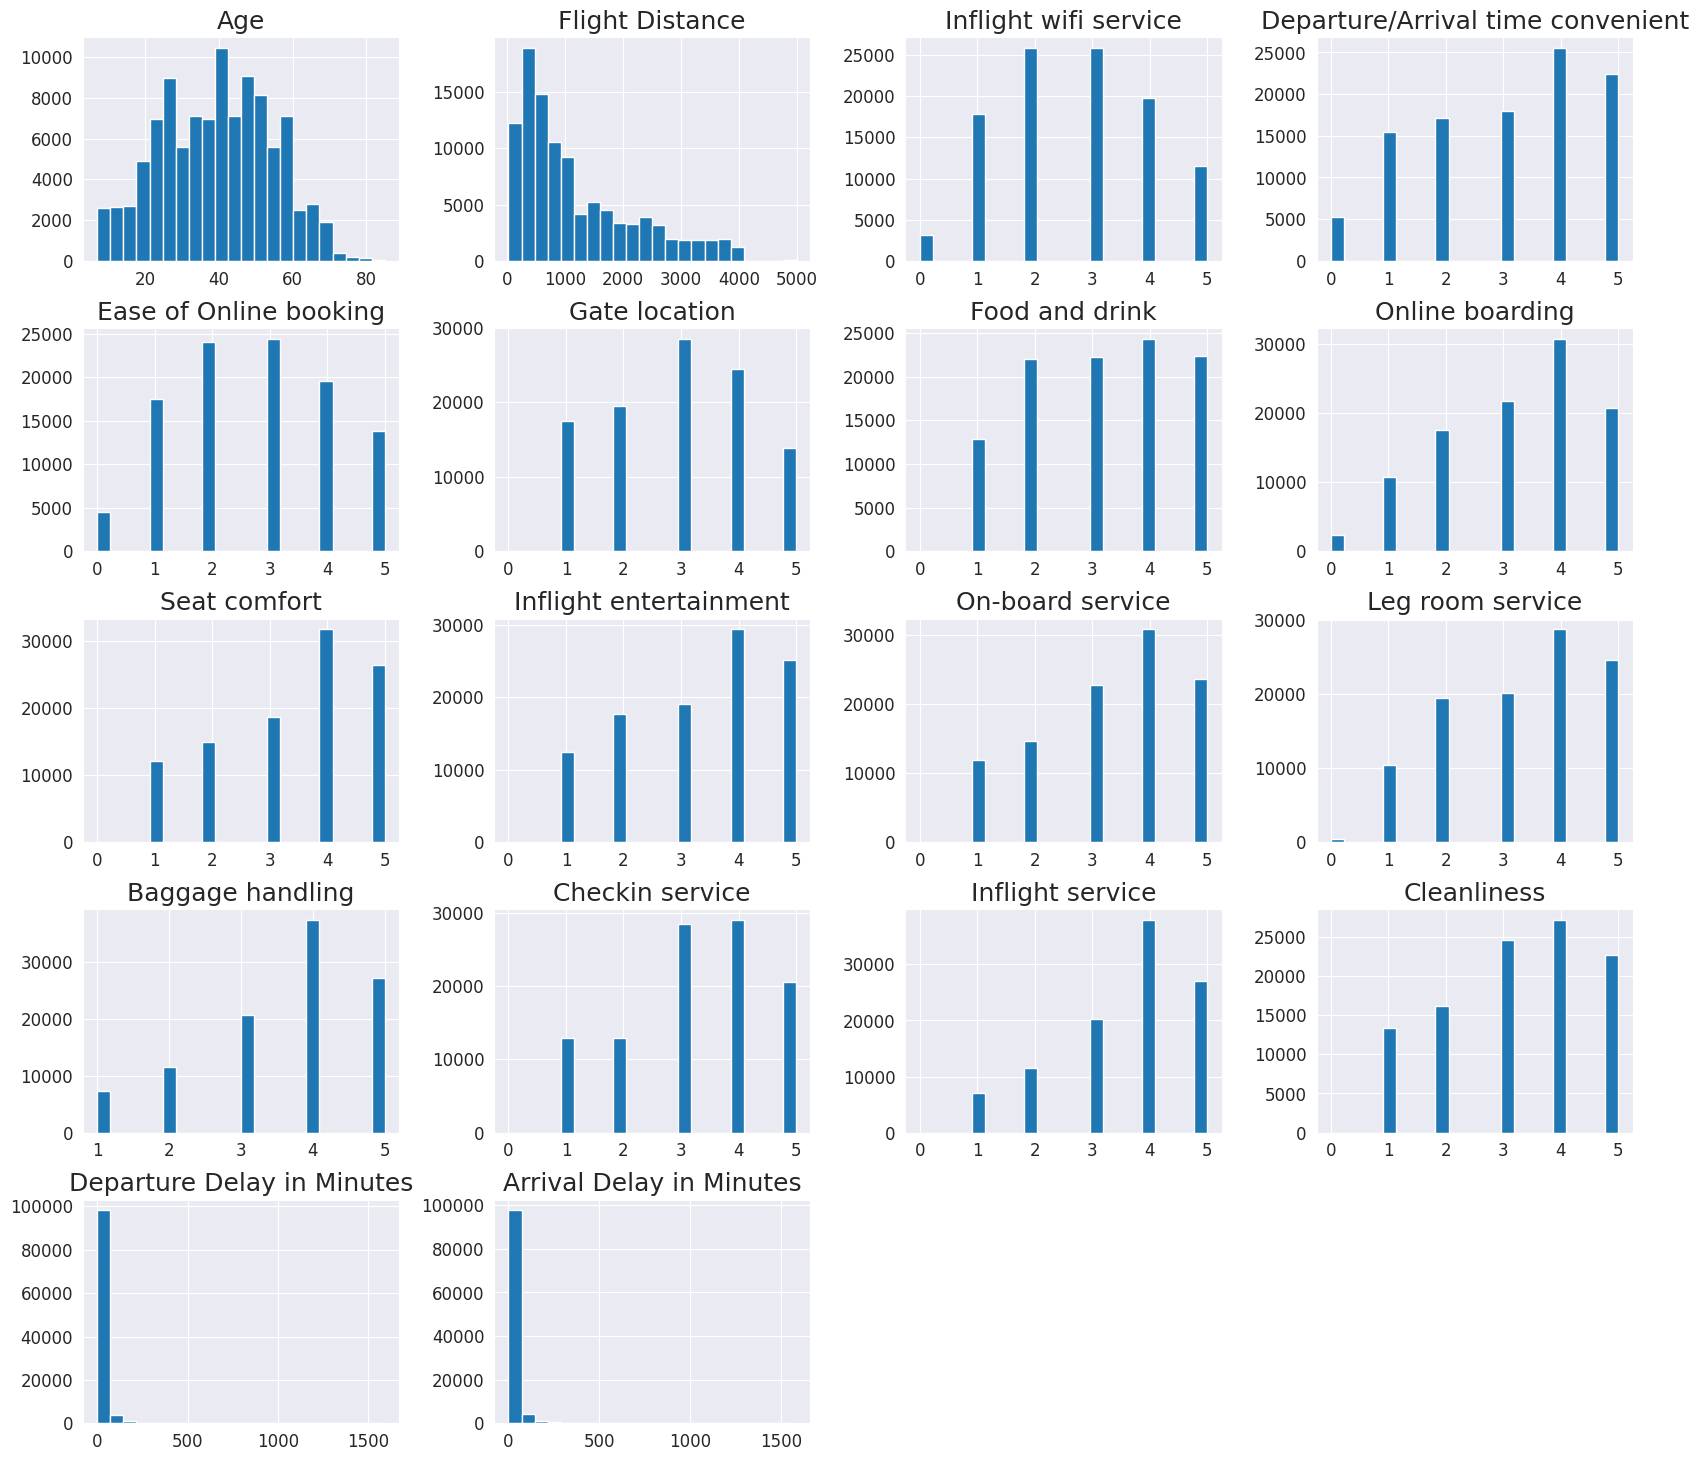

In [11]:
df.drop(['Unnamed: 0','id'],axis = 1).hist(bins=22, figsize=(20, 18), grid = True)
plt.show()

<div class= "alert alert-block alert-info">
    <b>   Note: From the previous visualization, the most frequency in the levels of satisfaction is ( 4 ) for all except:                     [ Inflight wifi service , Ease of Online booking , Gate location ] is ( 3 ) and the columns[ Flight Distance, Departure delay in minutes, Arrival delay in minutes] are right skewed   </b>
</div>

leet's go to see the skewed columns 

In [12]:
def plot(column_name):
    sns.displot(df[column_name], kind='kde', rug=True, fill=True, height=10, aspect=2 )
    plt.title(column_name, fontsize=30 , fontweight='bold')
    plt.show()

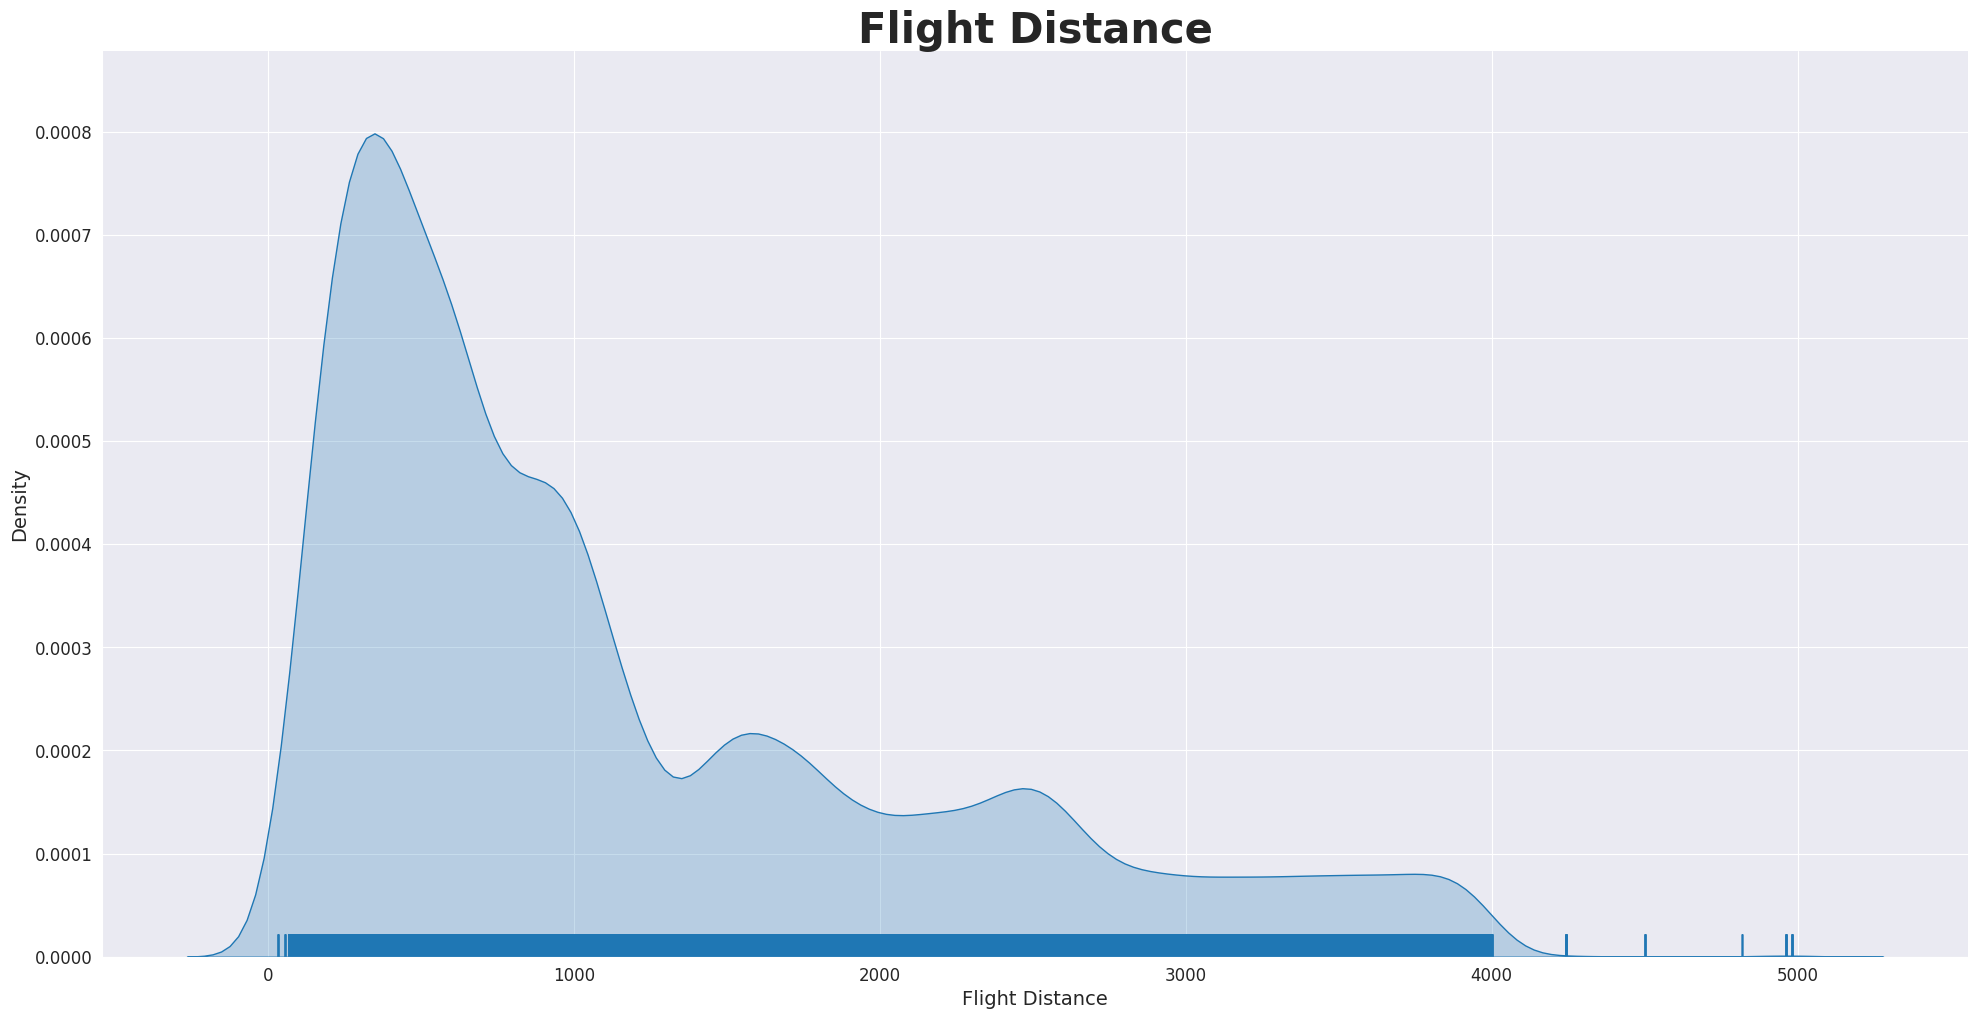

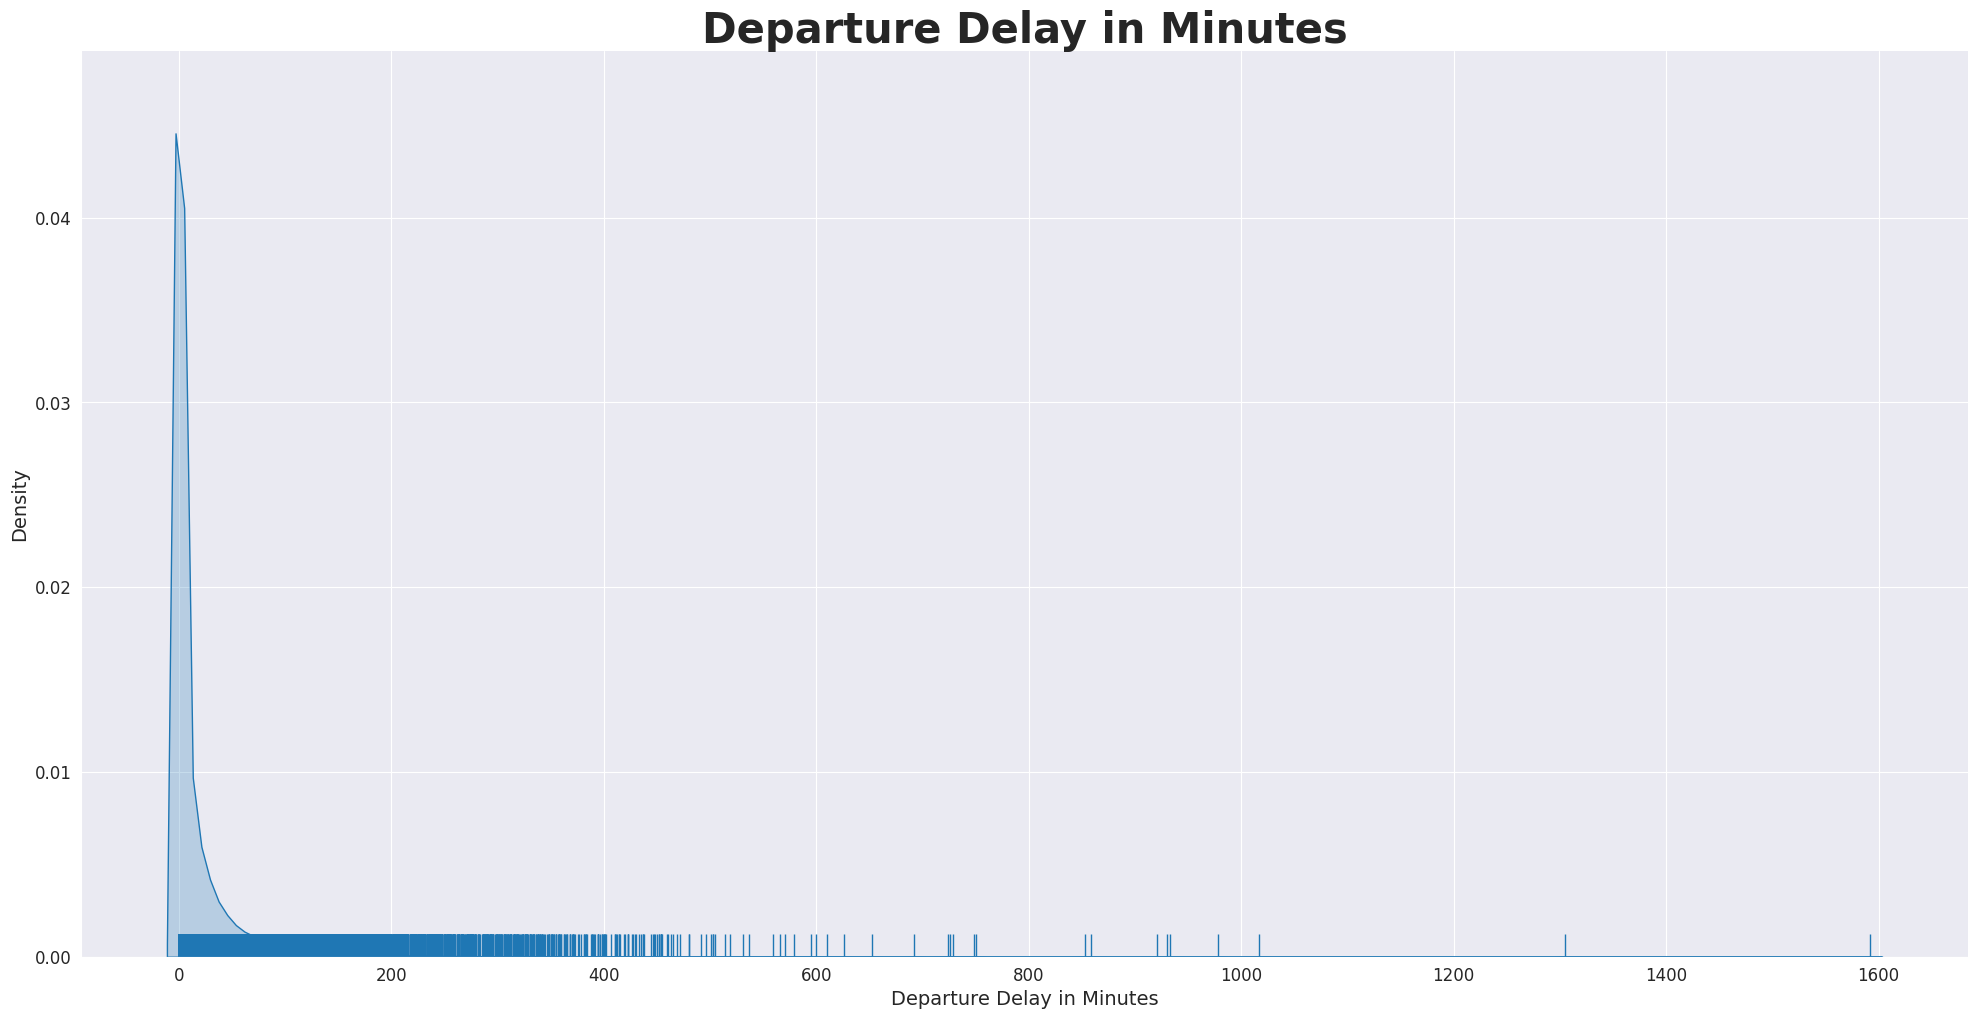

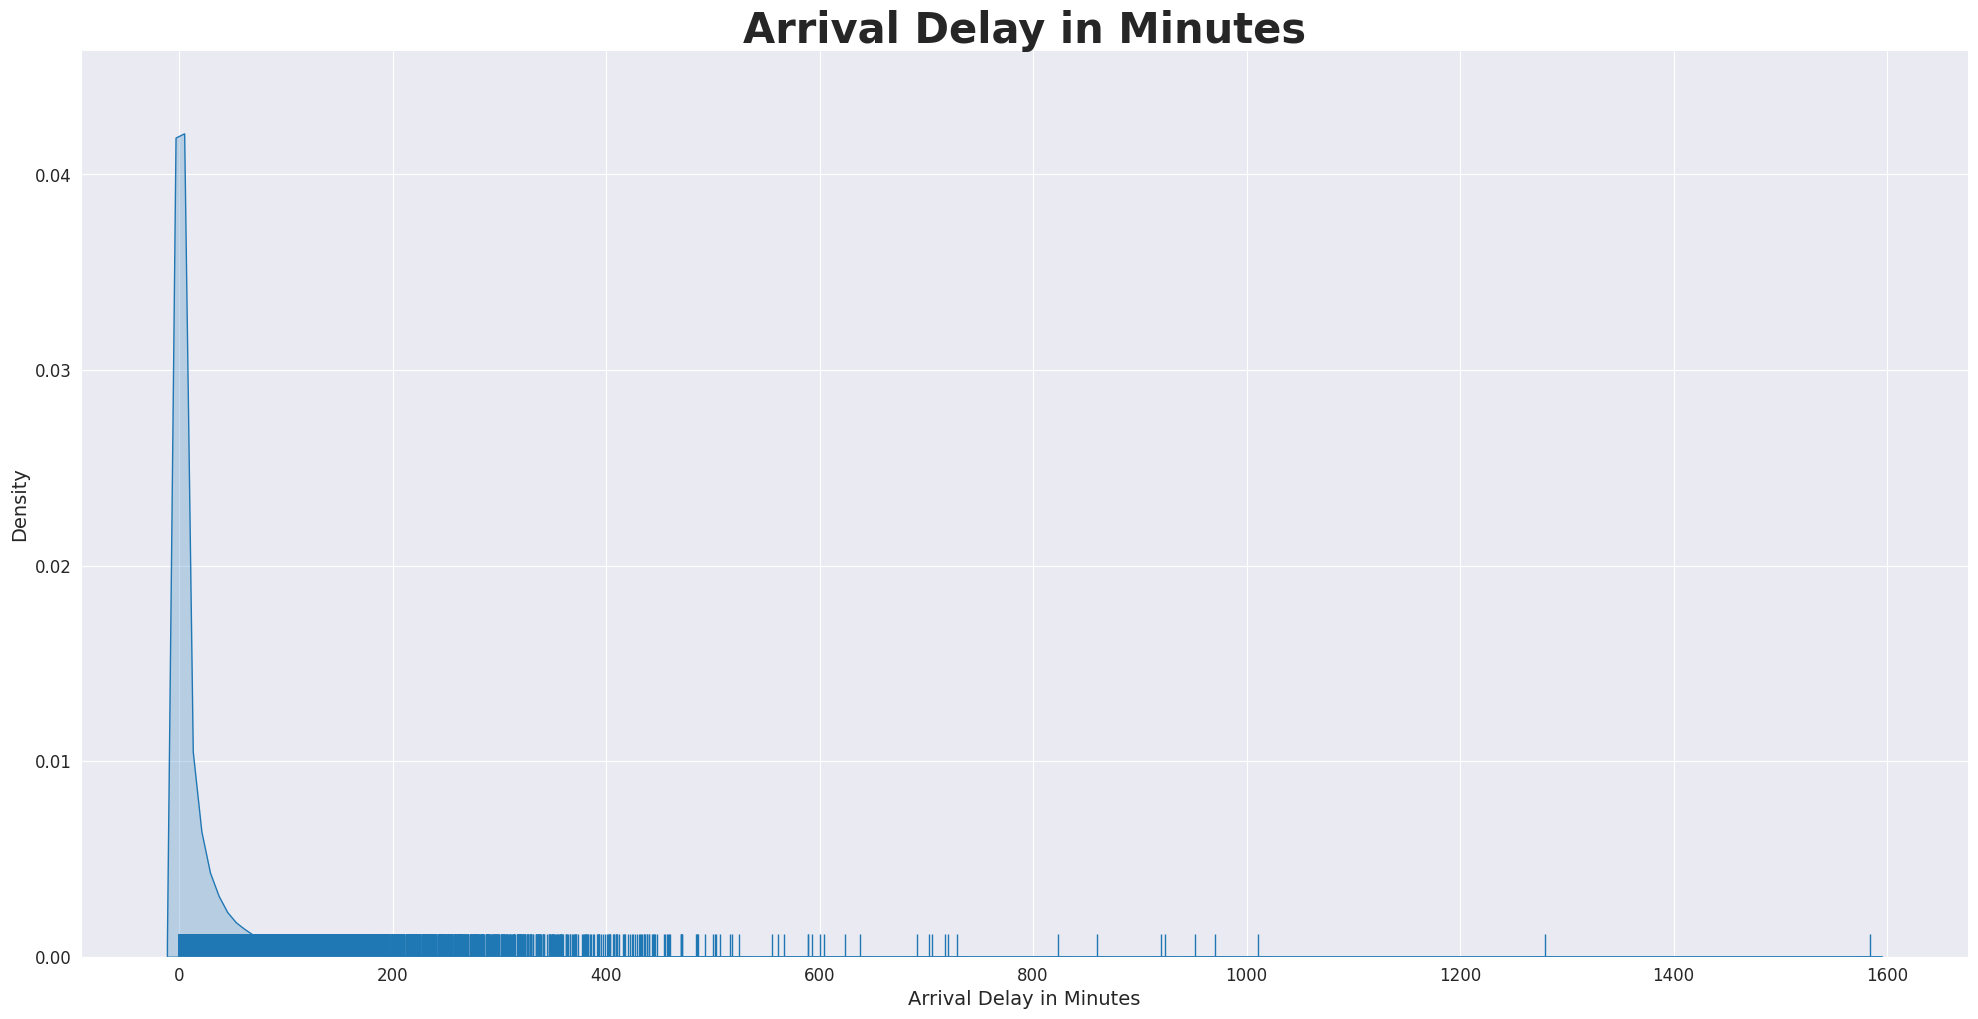

In [13]:
cols = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
for col in cols:
    plot(col)
    print('')

<div class= "alert alert-block alert-info">
    <b>   The previous visualization indicates that there are outliers in these columns that we will need to normalize it.  </b>
</div>

let's go see the age column with better form 

                                                    Most people is in range 40 year


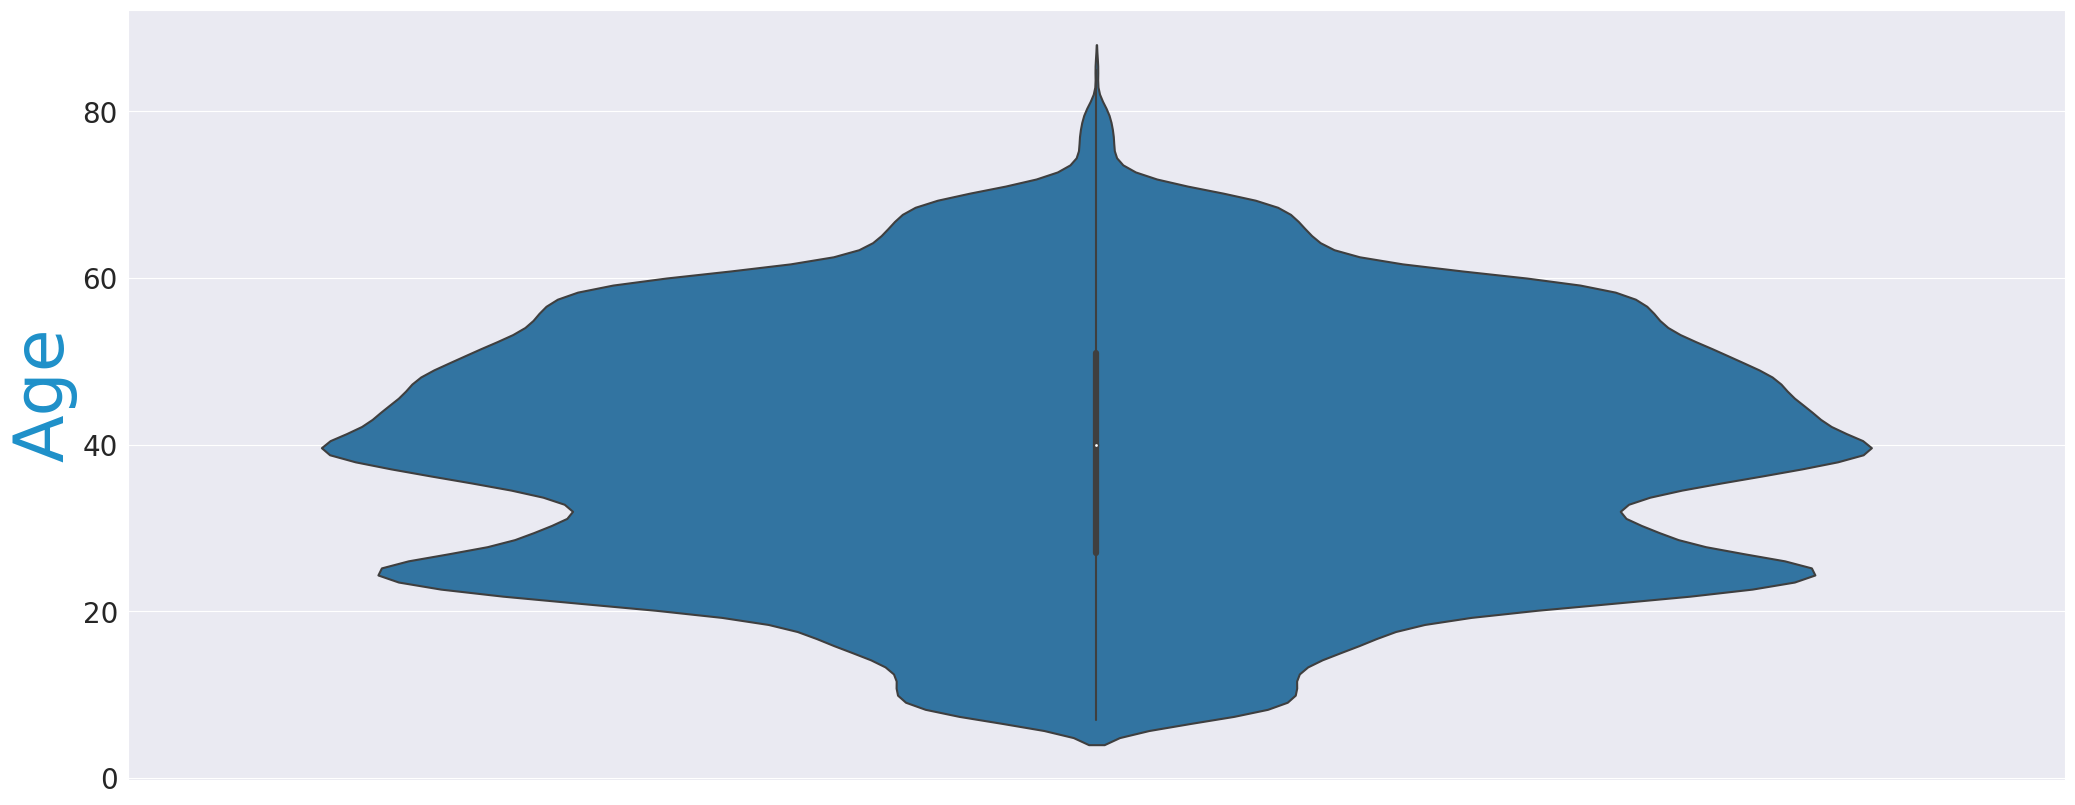

In [14]:
plt.figure(figsize = (25,10))

plt.rc('ytick', labelsize=20)
sns.violinplot(y = 'Age' , data = df)
plt.ylabel('Age' , size=50, color='#1e90c9')
print(Fore.BLUE + 52* ' ' + 'Most people is in range 40 year')
plt.show()

Ok, let's go plot the age column with Satisfaction 

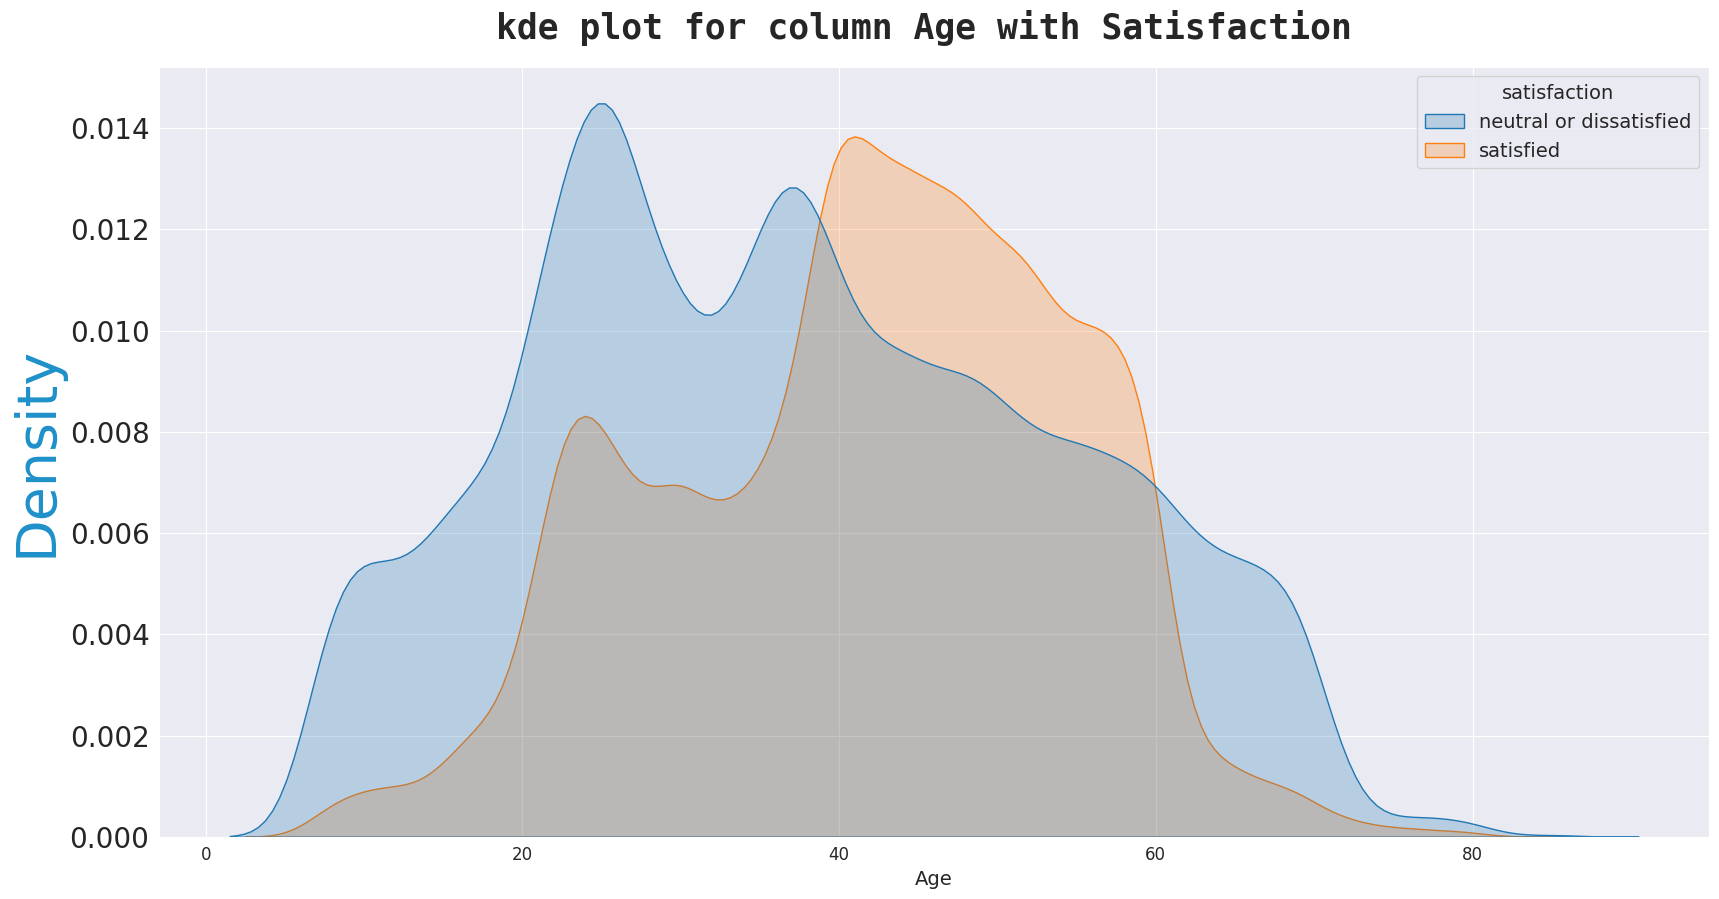

In [15]:
plt.figure(figsize = (20,10))

g = sns.kdeplot(data = df, x = 'Age', hue = 'satisfaction' , shade = True)

plt.rc('ytick', labelsize=20)
g.set_title("kde plot for column Age with Satisfaction ", size = 25, weight = "bold", fontname = "monospace", pad = 20)
plt.ylabel('Density' , size=40, color='#1e90c9')

plt.show()

<div class= "alert alert-block alert-info">
    <b>   Maybe we can see Satisfied people are in range [40-56] year & Unsatisfied are in range [20-40] year.   </b>
</div>

looking at most frequency of satisfaction with all object columns

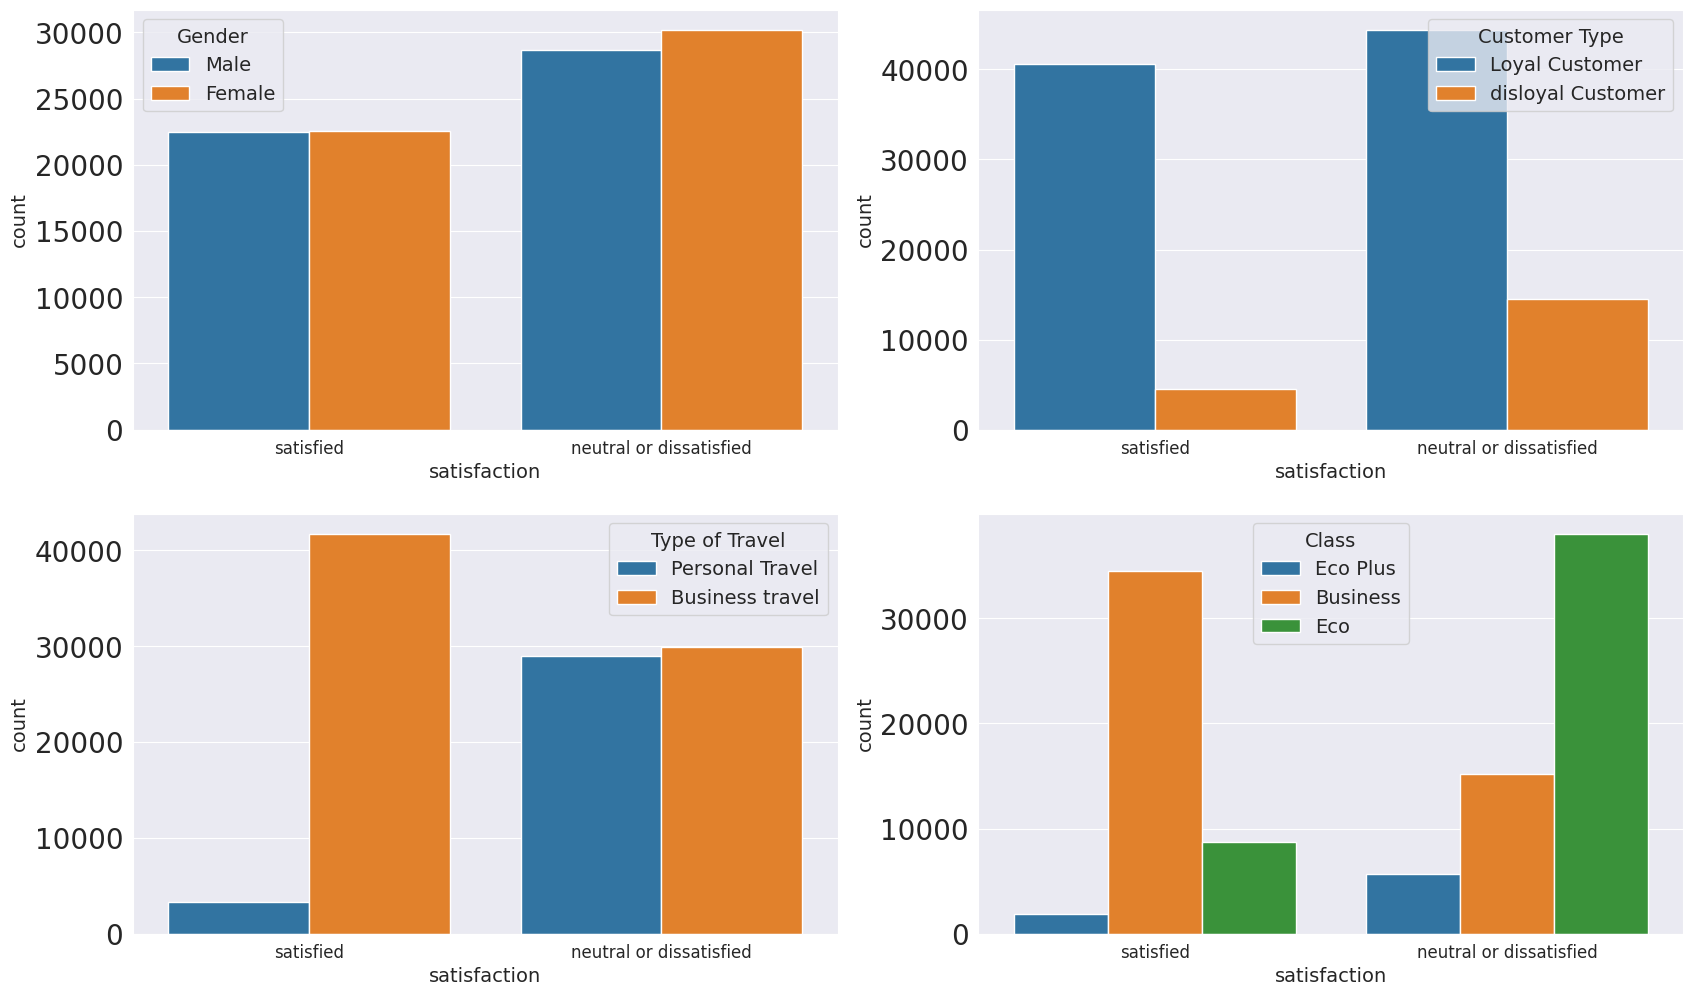

In [16]:
cols = df.drop('satisfaction' , axis = 1).select_dtypes(exclude=[np.number]).columns
fig, ax = plt.subplots(2, 2, figsize = (20, 12))
ax = ax.flatten()

for i, column in enumerate(cols):
    
    
    sns.countplot( data = df , x= 'satisfaction', hue = column , order = ['satisfied' ,'neutral or dissatisfied'] , ax = ax[i])
    
plt.show()

# <hr>

# Looking for Correlations

In [17]:
df_correlation = df.drop(['Unnamed: 0' , 'id'] , axis=1).select_dtypes(include=[np.number]).corr() # i drop this columns as i will droping it later
df_correlation

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.099461,0.017859,0.038125,0.024842,-0.001330,0.023000,0.208939,0.160277,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,-0.012147
Flight Distance,0.099461,1.000000,0.007131,-0.020043,0.065717,0.004793,0.056994,0.214869,0.157333,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.002158,-0.002426
Inflight wifi service,0.017859,0.007131,1.000000,0.343845,0.715856,0.336248,0.134718,0.456970,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,-0.019095
Departure/Arrival time convenient,0.038125,-0.020043,0.343845,1.000000,0.436961,0.444757,0.004906,0.070119,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.000864
Ease of Online booking,0.024842,0.065717,0.715856,0.436961,1.000000,0.458655,0.031873,0.404074,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371,-0.007984
Gate location,-0.001330,0.004793,0.336248,0.444757,0.458655,1.000000,-0.001159,0.001688,0.003669,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.005467,0.005143
Food and drink,0.023000,0.056994,0.134718,0.004906,0.031873,-0.001159,1.000000,0.234468,0.574556,0.622512,0.059073,0.032498,0.034746,0.087299,0.033993,0.657760,-0.029926,-0.032524
Online boarding,0.208939,0.214869,0.456970,0.070119,0.404074,0.001688,0.234468,1.000000,0.420211,0.285066,0.155443,0.123950,0.083280,0.204462,0.074573,0.331517,-0.018982,-0.021949
Seat comfort,0.160277,0.157333,0.122658,0.011344,0.030014,0.003669,0.574556,0.420211,1.000000,0.610590,0.131971,0.105559,0.074542,0.191854,0.069218,0.678534,-0.027898,-0.029900
Inflight entertainment,0.076444,0.128740,0.209321,-0.004861,0.047032,0.003517,0.622512,0.285066,0.610590,1.000000,0.420153,0.299692,0.378210,0.120867,0.404855,0.691815,-0.027489,-0.030703


Note: It's hard to see correlation so I'll use heatmap

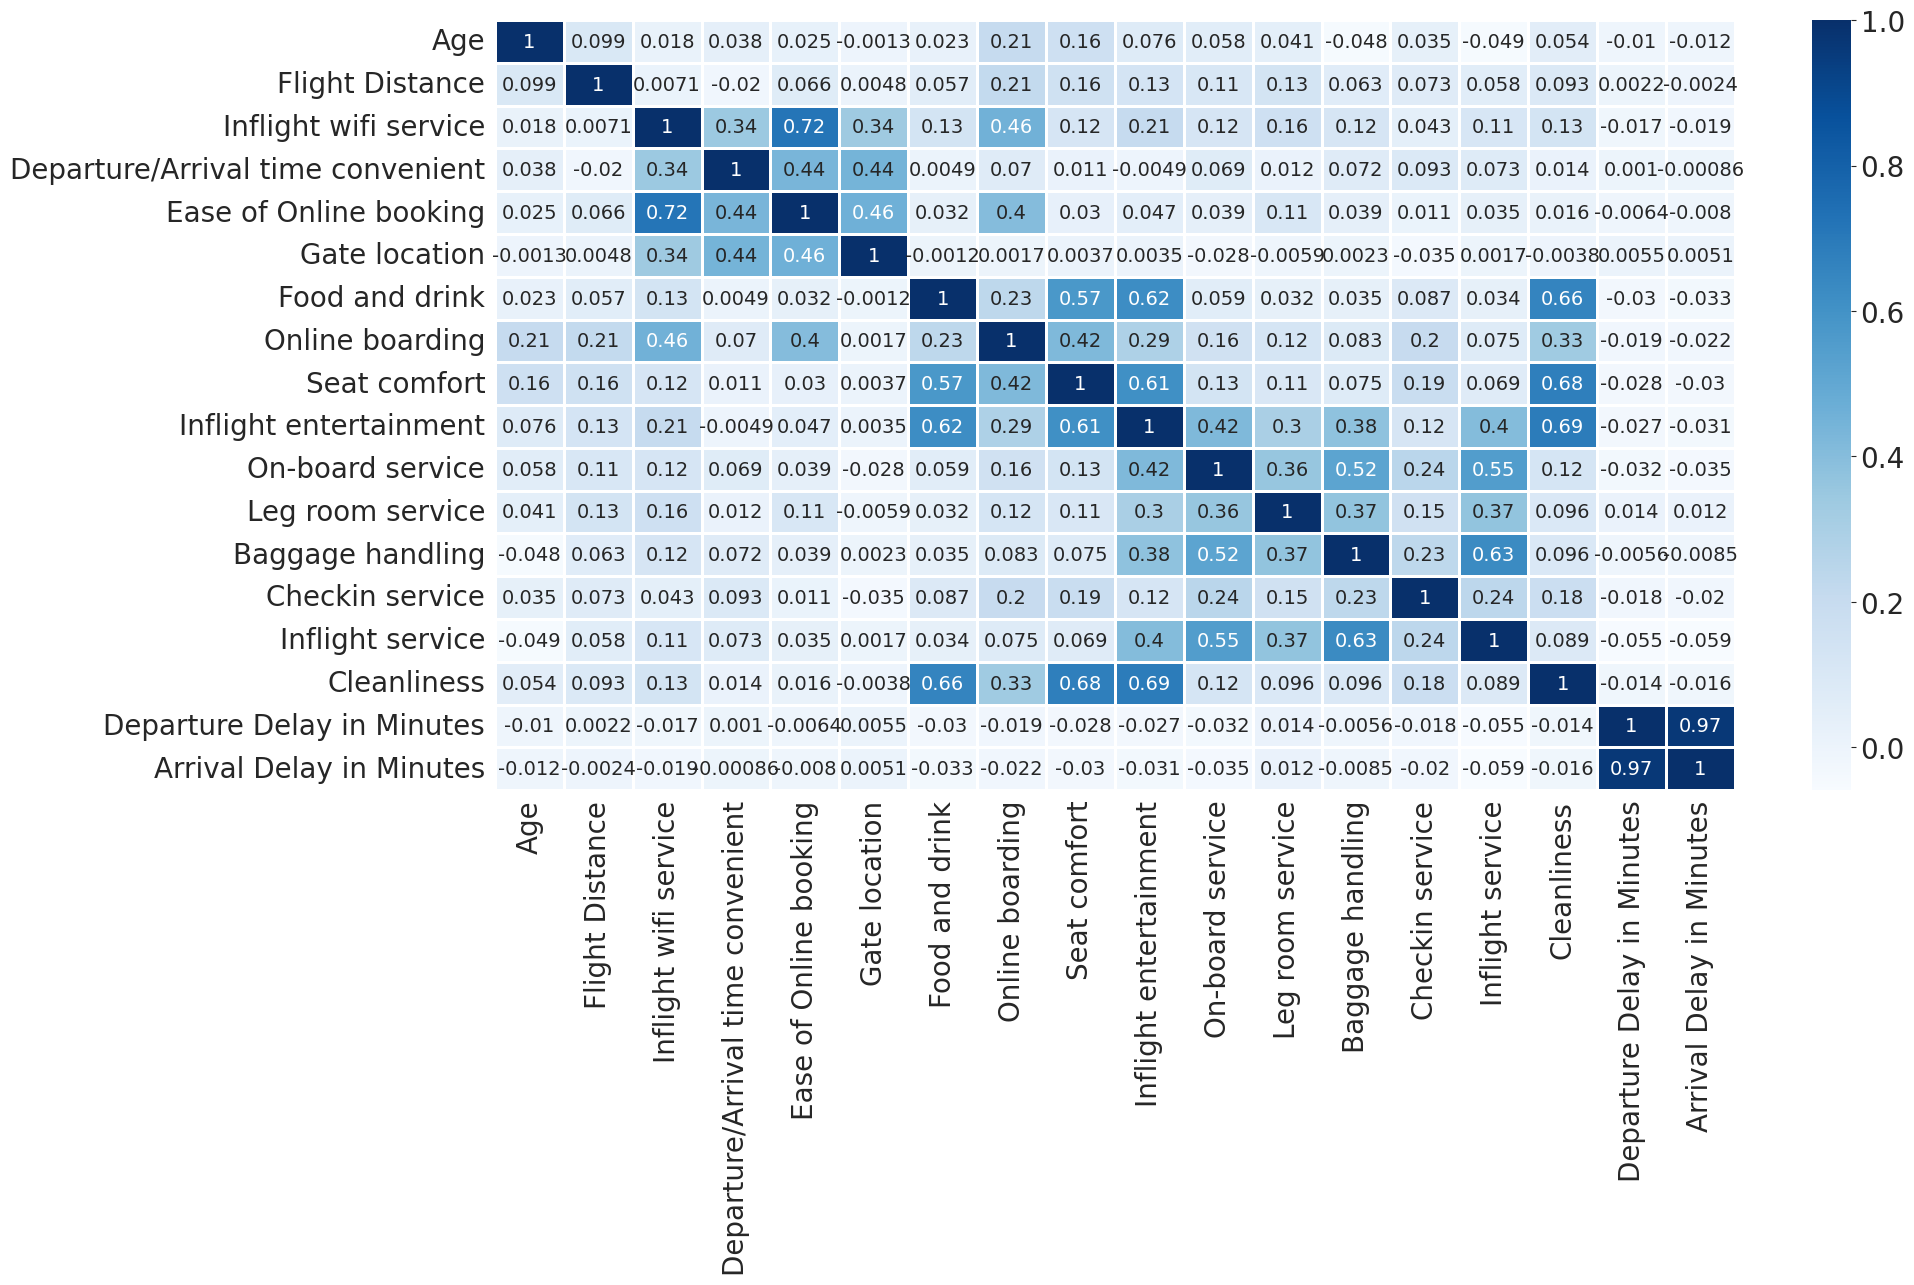

In [18]:
plt.figure(figsize = (20,10))
plt.rc('xtick', labelsize=20)

sns.heatmap(df_correlation, cmap='Blues' ,linewidths= 2 , linecolor = 'white' ,annot = True)
plt.show()

Ohh , there is a strng correlation between 'Departure Delay in Minutes' & 'Arrival Delay in Minutes'                              
let's go to see more about this 

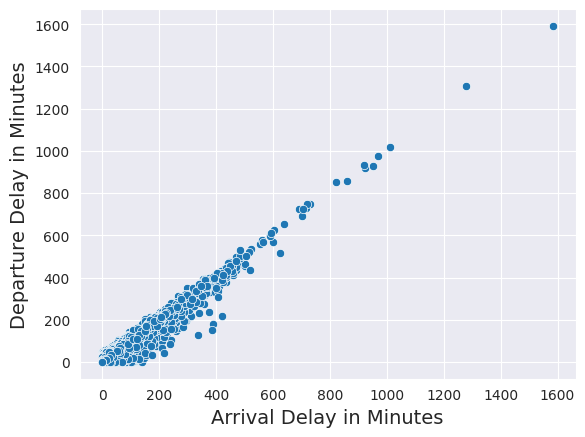

In [19]:
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

sns.scatterplot(x ='Arrival Delay in Minutes' , y = 'Departure Delay in Minutes' , data = df )
plt.show()

<div class= "alert alert-block alert-info">
       <b> Note(1): from this graph there are a strong correlation between: (Arrival Delay in Minutes)
                and (Departure Delay in Minutes) , We can also notice that Departure Delay is approximately equal to Arrival                     Delay. That tells us that the delay happens only before the start of the flight (not during the flight).

                I will dealing with strong correlation in feature engineering step  
</div> 

I will look into correlations with Satisfaction column

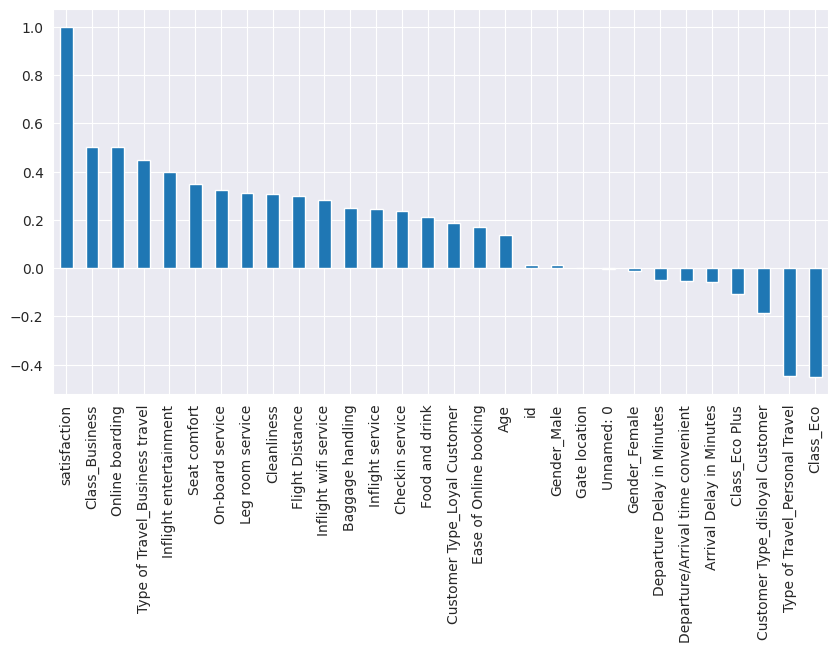

In [20]:
plt.figure(figsize = (10,5))

df["satisfaction"].replace({"satisfied": 1, "neutral or dissatisfied": 0}, inplace = True)
df_dummies = pd.get_dummies(df)
df_dummies.corr()['satisfaction'].sort_values(ascending = False).plot(kind = 'bar')
plt.show()

> ## Positively Correlated
> - Business Class ,online boarding and Business travels are strong reasons for people satisfaction.

> ## Negatively Correlated
> - Personal Travels and Economy Class results in Unsatisfaction.

<h>

<hr>

# Data Cleaning

I will do this by Function

In [21]:
def cleaning (data):    # this function for all cleaning
    
    data.drop(['Unnamed: 0' , 'id' , 'Arrival Delay in Minutes' ] , axis = 1 , inplace = True)
    return data

df["satisfaction"].replace({"satisfied": 1, "neutral or dissatisfied": 0}, inplace = True)

note i will call this function during testing

In [22]:
cleaning(df).head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,1


 missing values , There are no missing values anymore as they were deleted when i deleted 'Arrival Delay in Minutes' column

 Test

In [23]:
assert df.isna().sum().all() == 0

<hr>

# Modeling

In [24]:
# tools
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score , cross_val_predict
from sklearn.impute import SimpleImputer

# models
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression , SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import (VotingClassifier,
                              AdaBoostClassifier,
                              RandomForestClassifier,
                              ExtraTreesClassifier, 
                              GradientBoostingClassifier,
                              BaggingClassifier)


# metrics
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score , confusion_matrix ,ConfusionMatrixDisplay ,roc_curve ,roc_auc_score

In [25]:
x = df.drop("satisfaction", axis = 1)
y_train_full = df["satisfaction"]

Pipeline

In [26]:
x_num_has_outliers = ["Flight Distance", 'Departure Delay in Minutes']

x_cat = x.select_dtypes(exclude=[np.number]).columns

services = ['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']

age = ['Age']

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ("encoder", OneHotEncoder())
])
num_outliers_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = "median")), # i used median as there are outliers
    ("R_scaler", RobustScaler()),
    ("S_scaler", StandardScaler())
])

age_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = "mean")), 
    ("scaler", StandardScaler())
])

services_pipeline= Pipeline([
    ("imputer", SimpleImputer(strategy = "median"))
])

pipelines = ColumnTransformer([
    ("cat", cat_pipeline, x_cat),
    ("num", num_outliers_pipeline, x_num_has_outliers),
    ('age', age_pipeline , age),
    ("services", services_pipeline, services)
])

In [27]:
x_train_full = pipelines.fit_transform(x) 

test_data

In [28]:
x_test = pd.read_csv('/kaggle/input/airline-passenger-satisfaction/test.csv')
x_test.head(1)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied


In [29]:
x_test["satisfaction"].replace({"satisfied": 1, "neutral or dissatisfied": 0}, inplace = True)
x_test_full = pipelines.transform(cleaning(x_test))    # note: we should call cleaning function during this step

 looking the test data after we applyed pipeline

In [30]:
x__ = pd.DataFrame(x_test_full, columns= pipelines.get_feature_names_out(),
                            index=x_test.index)
x__.head()

,cat__Gender_Female,cat__Gender_Male,cat__Customer Type_Loyal Customer,cat__Customer Type_disloyal Customer,cat__Type of Travel_Business travel,cat__Type of Travel_Personal Travel,cat__Class_Business,cat__Class_Eco,cat__Class_Eco Plus,num__Flight Distance,num__Departure Delay in Minutes,age__Age,services__Inflight wifi service,services__Departure/Arrival time convenient,services__Ease of Online booking,services__Gate location,services__Food and drink,services__Online boarding,services__Seat comfort,services__Inflight entertainment,services__On-board service,services__Leg room service,services__Baggage handling,services__Checkin service,services__Inflight service,services__Cleanliness
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.032398,0.920317,0.834958,5.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.678348,-0.387532,-0.223601,1.0,1.0,3.0,1.0,5.0,4.0,5.0,4.0,4.0,4.0,4.0,3.0,4.0,5.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,-1.000307,-0.387532,-1.282160,2.0,0.0,2.0,4.0,2.0,2.0,2.0,2.0,4.0,1.0,3.0,2.0,2.0,2.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.193821,-0.387532,0.305678,0.0,0.0,0.0,2.0,3.0,4.0,4.0,1.0,1.0,1.0,1.0,3.0,1.0,4.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.007470,-0.387532,0.636478,2.0,3.0,4.0,3.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,4.0


In [31]:
y_test_full = x_test['satisfaction'] 

Split to Cross-Validation

In [32]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, 
                                                      test_size = 0.2, random_state = 42)

<hr> 

help functions

In [33]:
def accuracy_and_rmse(predict):
    
    print(Fore.BLUE + 'accuracy: ' + str( accuracy_score( predict , y_valid ) * 100 ) + " %")
    lin_rmse = mean_squared_error(y_valid, predict,
                              squared=False)
    print(Fore.BLUE + '\nrmse: ' + str(lin_rmse))     # rmse

In [34]:
def precision_recall_f1(predict):
    
    print('precision: '+ str(precision_score(y_valid , predict)))
    print('recall:    '+ str(recall_score(y_valid , predict)))
    print('F1_score:  '+ str(f1_score(y_valid , predict)))

In [35]:
def plot_roc_curve(fpr, tpr, label = None):
    
    plt.plot(fpr, tpr, linewidth = 2, label= 'auc= '+ str(label))
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate", fontname = "monospace", fontsize = 15, weight = "semibold")
    plt.ylabel("True Positive Rate(Recall)", fontname = "monospace", fontsize = 15, weight = "semibold")
    plt.title("ROC Curve", fontname = "monospace", fontsize = 17, weight = "bold")
    plt.axis([0, 1, 0, 1])
    plt.legend(loc=4)
    plt.show()

# Models

In [36]:
import time

model_name= []
accuracy = []
roc_auc = []
F1_score = []
training_time = []

models = [
    
    LogisticRegression(random_state = 42),
    SGDClassifier(random_state = 42),
    SVC(random_state = 42),
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state = 42),
    
           # ensamble models
    
    # Bagging
    BaggingClassifier(random_state = 42),
    RandomForestClassifier(random_state = 42),
    ExtraTreesClassifier(random_state = 42),
    # Boosting
    AdaBoostClassifier(random_state = 42),
    GradientBoostingClassifier(random_state = 42),
    XGBClassifier(random_state = 42)
]

for model in models :
    
    start_time = time.time()
    model.fit(x_train , y_train)
    fitting_time = time.time() - start_time
    
    prediction = model.predict(x_valid)
    model_name.append(model.__class__.__name__)
    accuracy.append(str( accuracy_score( prediction , y_valid ) * 100 ) + " %")
    roc_auc.append(str(roc_auc_score(y_valid , prediction)*100) + ' %')
    F1_score.append(str(f1_score(y_valid , prediction)* 100) + '%')
    training_time.append(fitting_time) 


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## look at the accuracy, auc, f1-score and training-time for all algorathim

In [37]:
models_df = pd.DataFrame({"model-name":model_name, "accuracy": accuracy ,'auc':roc_auc ,'F1-Score':F1_score , 'training-time':training_time })
models_df = models_df.set_index('model-name')
models_df.sort_values("auc", ascending = False)

,accuracy,auc,F1-Score,training-time
model-name,,,,
RandomForestClassifier,96.38130985034407 %,96.10755824561785 %,95.77338129496404%,10.903292
XGBClassifier,96.18401424378038 %,95.95121604334153 %,95.56065610479762%,0.785168
ExtraTreesClassifier,96.11183292430584 %,95.83488900524156 %,95.45914353152747%,8.545428
BaggingClassifier,96.00115490111159 %,95.70806941988647 %,95.32384221484442%,4.205429
DecisionTreeClassifier,94.7500120302199 %,94.67912520410309 %,93.99262155167666%,0.618226
SVC,94.33617246523266 %,94.0567593093924 %,93.40135673039188%,87.552445
GradientBoostingClassifier,94.05225927529955 %,93.78871565873878 %,93.08337996642418%,13.143378
KNeighborsClassifier,93.14758673788558 %,92.72471045201756 %,91.92652228143781%,0.003942
AdaBoostClassifier,92.84442519609259 %,92.63258749708275 %,91.73199888796219%,4.185218


<div class= "alert alert-block alert-info">
             <b> Note: The best model is "RandomForest" </b>
</div> 

let's go to exploration more and fine-tuning for "RandomForest"

# Fine-Tuning

In [38]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100,300, 500, 700], 
    'max_depth': [None, 10, 20, 30]
}

rf_fine_tuning = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')


In [39]:
rf_fine_tuning.fit(x_train_full, y_train_full)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ...................max_depth=None, n_estimators=100; total time=  17.0s
[CV] END ...................max_depth=None, n_estimators=300; total time=  51.8s
[CV] END ...................max_depth=None, n_estimators=500; total time= 1.3min
[CV] END ...................max_depth=None, n_estimators=700; total time= 1.9min


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END ...................max_depth=None, n_estimators=100; total time=  15.9s
[CV] END ...................max_depth=None, n_estimators=100; total time=  16.3s
[CV] END ...................max_depth=None, n_estimators=300; total time=  48.9s
[CV] END ...................max_depth=None, n_estimators=500; total time= 1.4min
[CV] END ...................max_depth=None, n_estimators=700; total time= 1.9min
[CV] END ...................max_depth=None, n_estimators=100; total time=  16.2s
[CV] END ...................max_depth=None, n_estimators=300; total time=  48.9s
[CV] END ...................max_depth=None, n_estimators=300; total time=  49.4s
[CV] END ...................max_depth=None, n_estimators=500; total time= 1.3min
[CV] END ...................max_depth=None, n_estimators=700; total time= 2.0min
[CV] END ...................max_depth=None, n_estimators=100; total time=  16.2s
[CV] END ...................max_depth=None, n_estimators=300; total time=  49.1s
[CV] END ...................

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [100, 300, 500, 700]},
             scoring='accuracy', verbose=2)

In [40]:
print("Best Hyperparameters:", rf_fine_tuning.best_params_)

best_rf = rf_fine_tuning.best_estimator_
y_pred = best_rf.predict(x_valid)

accuracy = accuracy_score(y_valid, y_pred)*100
print( f'Accuracy:  {accuracy:.2f}' )

Best Hyperparameters: {'max_depth': None, 'n_estimators': 300}
Accuracy:  100.00


# <h2 style = "color: #35454F">Evaluating the model by test data</h2>

In [41]:
y_pred = best_rf.predict(x_test_full)

print(Fore.BLUE + '\nfinal_accuracy: ' + str( accuracy_score( y_pred , y_test_full ) * 100 ) + " %\n")
f_rmse = mean_squared_error( y_test_full, y_pred,
                              squared=False)
print( Fore.BLUE + 'rmse: ' + str( f_rmse ))


final_accuracy: 96.34277794887589 %

rmse: 0.1912386480584956


<div class= "alert alert-block alert-info">
             <b> we can note that the model be overfitting when try fine tuning, so we will use the model with defult hyperparameters </b>
</div> 

In [42]:
final_model = RandomForestClassifier(random_state=42)
final_model.fit(x_train_full, y_train_full)

RandomForestClassifier(random_state=42)

In [43]:
y_pred = final_model.predict(x_test_full)

print(Fore.BLUE + '\nfinal_accuracy: ' + str( accuracy_score( y_pred , y_test_full ) * 100 ) + " %\n")
f_rmse = mean_squared_error( y_test_full, y_pred,
                              squared=False)
print( Fore.BLUE + 'rmse: ' + str( f_rmse ))


final_accuracy: 96.32352941176471 %

rmse: 0.1917412472118426


We can compute a 95% confidence interval for the test RMSE:

In [44]:
from scipy import stats

confidence = 0.95
squared_errors = (y_pred - y_test_full) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([0.18567739, 0.19761912])

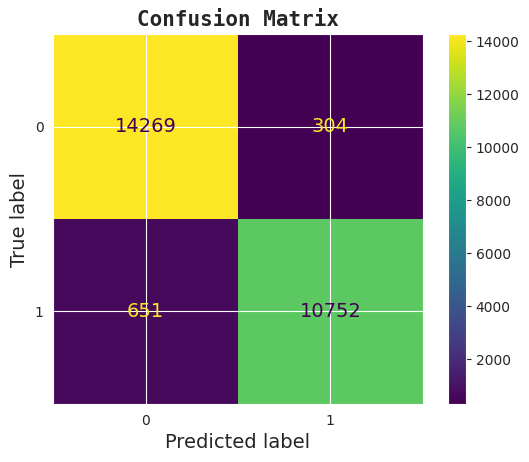

In [45]:
ConfusionMatrixDisplay.from_predictions(y_test_full , y_pred)
plt.title("Confusion Matrix", fontname = "monospace", fontsize = 15, weight = "bold")
plt.show()

In [46]:
print('precision: '+ str(precision_score(y_test_full , y_pred)))
print('recall:    '+ str(recall_score(y_test_full , y_pred)))
print('F1_score:  '+ str(f1_score(y_test_full , y_pred)))

precision: 0.9725036179450073
recall:    0.9429097605893186
F1_score:  0.9574780711518768


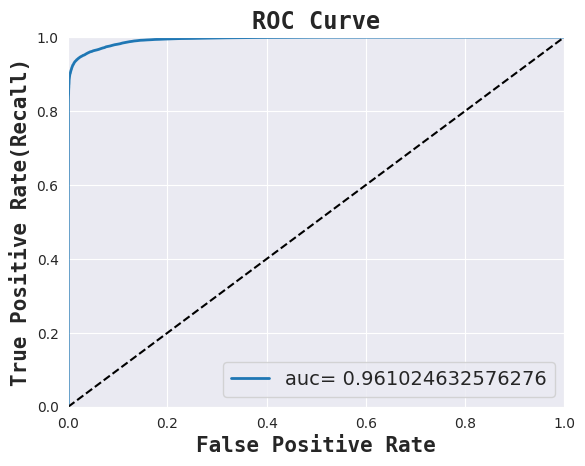

In [48]:
rf_fpr, rf_tpr, thresholds = roc_curve(y_test_full, final_model.predict_proba(x_test_full)[:,1])
plot_roc_curve(rf_fpr , rf_tpr, roc_auc_score(y_test_full , y_pred))

# <hr>

## full_pipeline

In [49]:
full_pipeline = Pipeline([
    ("preprocessing", pipelines),
    ("random_forest", final_model),
])
full_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['Gender', 'Customer Type', 'Type of Travel', 'Class'], dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('R_scaler',
                                                                   RobustScaler()),
                                                                  ('S_scaler',...
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Inflight service',
                                                   'Cleanliness'])])),
                ('random_forest', RandomForestClassifier(random_state=42))])

# The End

<hr>